## Sistema Lotka-Volterra
### Modelo depredador-presa 

En un modelo Lotka-Volterra es basada en las sigueintes supuestos:
- Solo existen 2 especies, 1 para el depredador y 1 para la presa
- la tasa de variación de la población es directamente proporcional a su tamaño
- la especie depredadora depende totalmente de la especie presa como único suministro de alimento
- no hay limitacion de alimentamiento para la presa

El modelo de depredaro presa es un sistema de 2 ecuaciones diferenciales ordinarias:

$$ \frac{ dx }{ dt } = \alpha x - \beta xy$$

$$ \frac{dy}{dt} = \delta xy - \gamma y$$

In [512]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [513]:
""" alpha, beta, delta, gamma = 0.05, 0.01, 0.01, 0.05 """

' alpha, beta, delta, gamma = 0.05, 0.01, 0.01, 0.05 '

In [514]:
alpha, beta, delta, gamma = 0.1, 0.02, 0.01, 0.1

In [515]:
num_generations = 400
population_size = 50
mutation_rate = 0.1
num_parents = 10

In [516]:
class Individual:
    def __init__(self, speed, evasion):
        self.speed = speed
        self.evasion = evasion
        self.fitness = 0

In [517]:
def fitness_function(prey_population, predator_population,individual):
    fitness = prey_population * individual.evasion - predator_population * individual.speed
    return max(fitness, 0)

In [518]:
def initialize_population(size):
    return [Individual(speed=random.uniform(0.5, 1.5), evasion=random.uniform(0.5, 1.5)) for _ in range(size)]

In [519]:
def select_parents(population):
    population.sort(key=lambda x: x.fitness, reverse=True)
    return population[:num_parents]

In [520]:
def crossover(parent1, parent2):
    child1 = Individual(speed=parent1.speed, evasion=parent2.evasion)
    child2 = Individual(speed=parent2.speed, evasion=parent1.evasion)
    return child1, child2

In [521]:
def mutate(individual):
    if random.random() < mutation_rate:
        individual.speed += random.uniform(-0.1, 0.1)
        individual.evasion += random.uniform(-0.1, 0.1)
    return individual

In [522]:
prey_population = 40
predator_population = 10
prey_history, predator_history = [], []

In [523]:
population = initialize_population(population_size)
print(population_size)
print(len(population))

50
50


In [ ]:
print(population_size)
print(f"population inicial {len(population)}")
for generation in range(num_generations):
    # Actualizar aptitud de cada individuo

    for individual in population:
        print(f"individual speed {individual.speed}")
        print(f"individual evasion {individual.evasion}")
        individual.fitness = fitness_function(prey_population, predator_population, individual)
        print(f"individual fitness {individual.fitness}")
        
    
    # Selección de los mejores individuos
    parents = select_parents(population)
    
    # Crear nueva generación mediante cruce y mutación
    next_generation = []
    for i in range(0, num_parents, 2):
        child1, child2 = crossover(parents[i], parents[i + 1])
        next_generation.append(mutate(child1))
        next_generation.append(mutate(child2))
    print(f"next generation size {len(next_generation)}")
    
    # Añadir hijos mutados a la población y eliminar los menos aptos
    for u in population:
        print(f"fitness {u.fitness}")
        print(f"evasion {u.evasion}")
    population = parents + next_generation
    print(f"parents + next {len(population)}")
    
    population = sorted(population, key=lambda x: x.fitness, reverse=True)[:population_size]
    print(f"sorted {len(population)}")

    # Simulación de un paso de Lotka-Volterra
    prey_population += alpha * prey_population - beta * prey_population * predator_population
    print(f"prey population {prey_population}")
    predator_population += delta * prey_population * predator_population - gamma * predator_population
    print(f"predator population {prey_population} \n")


    # Guardar historia de poblaciones
    prey_history.append(prey_population)
    predator_history.append(predator_population)
""" 
    # Redondeo de poblaciones para evitar errores de tipo
    predator_population = int(round(predator_population))
    prey_population = int(round(prey_population)) """

50
population inicial 50
individual speed 0.9860033922096336
individual evasion 0.6992651181575723
individual fitness 18.110570804206553
individual speed 1.4820262261693304
individual evasion 1.2025467286254008
individual fitness 33.28160688332272
individual speed 1.0355816021530235
individual evasion 1.459810721532277
individual fitness 48.03661283976085
individual speed 0.9719248016810668
individual evasion 1.3820292566605517
individual fitness 45.5619222496114
individual speed 0.6471148634431544
individual evasion 0.811601974191464
individual fitness 25.992930333227015
individual speed 1.0321523153197738
individual evasion 1.381950264848037
individual fitness 44.95648744072374
individual speed 1.148274304555808
individual evasion 0.5227467351368003
individual fitness 9.42712635991393
individual speed 0.7843637368520392
individual evasion 1.4012143668237753
individual fitness 48.20493730443062
individual speed 1.0298589940796268
individual evasion 0.945143728219782
individual fitness

' \n    # Redondeo de poblaciones para evitar errores de tipo\n    predator_population = int(round(predator_population))\n    prey_population = int(round(prey_population)) '

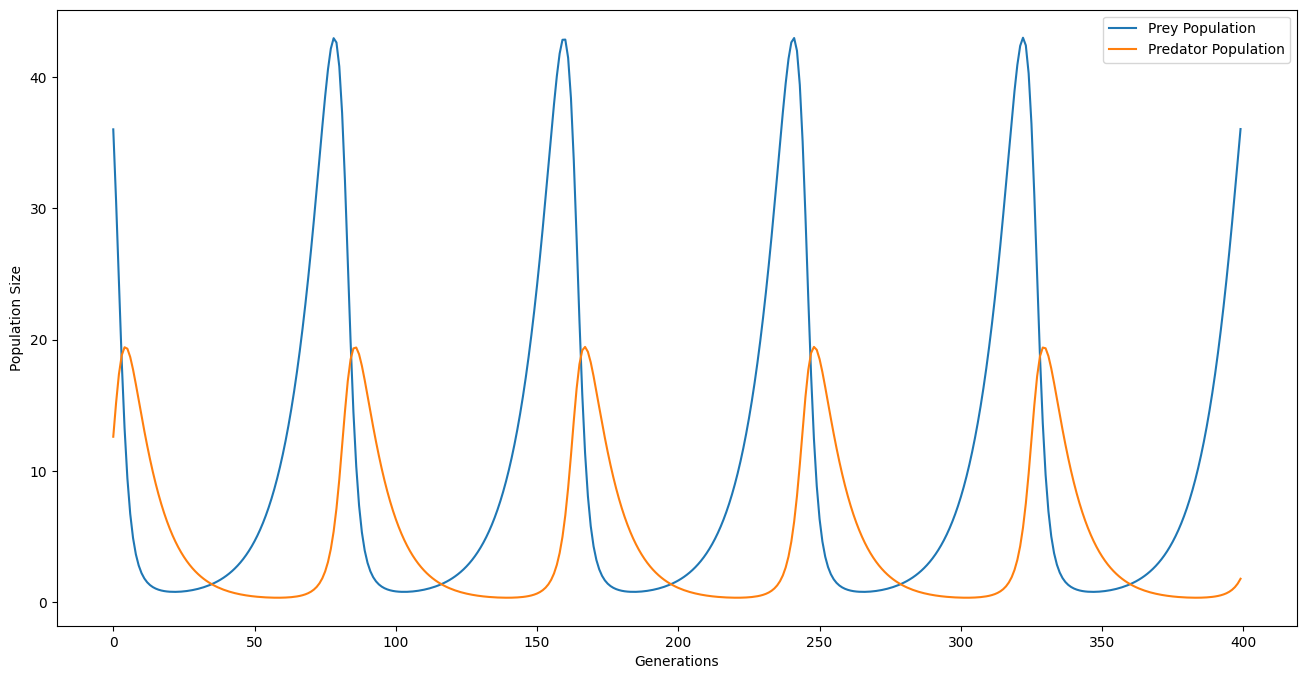

In [525]:
# Graficar los resultados
fig, ax = plt.subplots()
plt.plot(prey_history, label="Prey Population")
plt.plot(predator_history, label="Predator Population")
plt.xlabel("Generations")
plt.ylabel("Population Size")
plt.legend()
fig.set_size_inches(16,8)
plt.show()